In [2]:
#import statistics
#from collections import Counter
import pandas as pd
#from pandasql import sqldf
import sqlite3
from pathlib import Path
#from sqlalchemy import create_engine
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

DB_PATH = Path.cwd() / "resultados.db"

def get_connection(db_path: Path = DB_PATH) -> sqlite3.Connection:
    conn = sqlite3.connect(str(db_path), timeout=10)
    conn.row_factory = sqlite3.Row  
    return conn

conn = get_connection()
#

#### Convertendo as tabelas do banco de dados em DataFrame

In [3]:
query_all = "select d.dt_jogo,d.horario, d.sigla_hora, r.numMilhar, r.numCentena, r.numDezena, g.premio,g.animal FROM datajogo d INNER JOIN grupo g on d.id = g.data_id INNER JOIN resultjogo r on g.id = r.data_id"
all_table = pd.read_sql_query(query_all, conn)
#conn.close()
print(all_table.head())

      dt_jogo horario sigla_hora numMilhar numCentena numDezena     premio  \
0  11/01/2026   18:55         PT      3184        550        65  1º Premio   
1  10/01/2026   11:00        PTM      0540        424        96  1º Premio   
2  09/01/2026   14:00         PT      0503        805        59  1º Premio   
3  08/01/2026   16:00        PTV      7231        212        79  1º Premio   
4  07/01/2026   18:00        PTN      8031        571        80  1º Premio   

   animal  
0  Macaco  
1    Galo  
2  Jacaré  
3   Tigre  
4   Cobra  


#### Sorteio com animal Águia

In [4]:
grupo_aguia = all_table['animal'].str.contains("Águia", na=False)
df_aguia = all_table[grupo_aguia]
print(df_aguia)


        dt_jogo horario sigla_hora numMilhar numCentena numDezena     premio  \
12   30/12/2025   14:00         PT      1870        748        08  1º Premio   
17   25/12/2025   14:00         PT      8406        227        80  1º Premio   
38   04/12/2025   16:00        PTV      2874        818        68  1º Premio   
39   03/12/2025   18:00        PTN      7840        901        60  1º Premio   
45   27/11/2025    9:00        PPT      0160        125        12  1º Premio   
98   05/10/2025   16:00        PTV      4139        416        22  1º Premio   
109  24/09/2025   18:00        PTN      4482        905        71  1º Premio   
128  05/09/2025   16:00        PTV      3259        043        71  1º Premio   
241  15/05/2025   11:00        PTM      2396        296        15  1º Premio   
249  07/05/2025   18:00        PTN      0327        672        06  1º Premio   
252  04/05/2025   14:00         PT      5193        946        21  1º Premio   
264  22/04/2025   18:00        PTN      

#### Gráfico do jogo

#### Animais mais sorteado em um período.

#### As cores mais escuras indicam maior frequência e as cores mais claras indicam menor frequência

Text(0, 0.5, 'Quantidade de vezes que são sorteado')

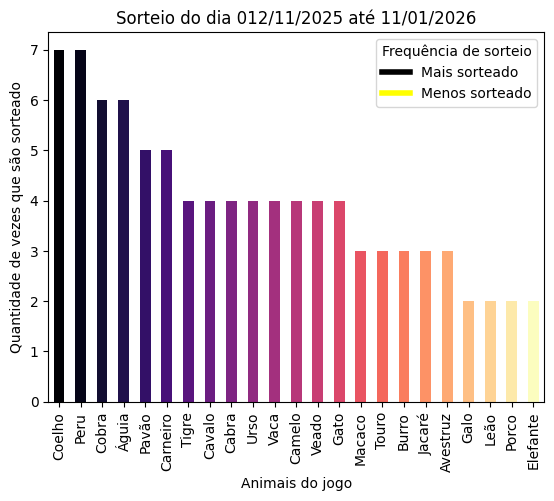

In [5]:

dta_inicio = '012/11/2025' # <= VE ESSE ERRO
dta_fim = '11/01/2026'

df_faixa_data = all_table[all_table['dt_jogo'].between(dta_inicio,dta_fim)] 
counts_df_faixa_data = df_faixa_data['animal'].value_counts()
cores_dinamicas = cm.magma(np.linspace(0, 1, len(counts_df_faixa_data)))

counts_df_faixa_data.plot(kind='bar',x='Animal',y='Sortiado', 
        color=cores_dinamicas,
        legend=False) 


legend_elements = [
    Line2D([0], [0], color='black', lw=4, label='Mais sorteado'),
    Line2D([0], [1], color='yellow', lw=4, label='Menos sorteado')
    #Patch(facecolor='orange', edgecolor='r', label='Área Laranja')
]
plt.legend(handles=legend_elements, loc='upper right', title='Frequência de sorteio')

plt.title('Sorteio do dia ' + str(dta_inicio)+' até '+ str(dta_fim)+'')
plt.xlabel('Animais do jogo')
plt.ylabel('Quantidade de vezes que são sorteado')


#### Convertendo a coluna numMilhar string para int

In [6]:
all_table['numMilhar'] = all_table['numMilhar'].astype(int)

df_numMilhar = pd.DataFrame()
intervalos = [(1000, 2000), (3000, 4000), (4000, 5000),(5000, 6000),(6000, 7000),(7000, 8000),(8000, 9000),(9000, 9999)]

for inicio, fim in intervalos:
    resultado = all_table.query('numMilhar >= @inicio and numMilhar <= @fim')
    
    df_numMilhar = pd.concat([df_numMilhar, resultado], ignore_index=True)
#print(df_numMilhar) 



#### Os milhares mais sorteado em um período

Text(0, 0.5, 'Quantidade de vezes que são sorteado')

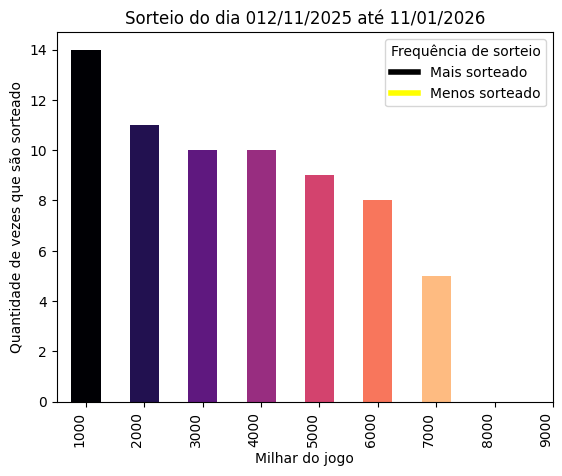

In [7]:

#dta_inicio = '012/11/2025' # <= VE ESSE ERRO
#dta_fim = '11/01/2026'


limites_milhar = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000,9000]
df_milhar = df_numMilhar[df_numMilhar['dt_jogo'].between(dta_inicio,dta_fim)] 
counts_df_numMilhar = df_milhar['numMilhar'].value_counts(bins=limites_milhar)
cores_dinamicas = cm.magma(np.linspace(0, 1, len(counts_df_numMilhar)))

counts_df_numMilhar.plot(kind='bar',x='Milhar',y='Sortiado', 
        color=cores_dinamicas,
        legend=False) 

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8 ], labels=['1000', '2000', '3000'
                                                  , '4000', '5000', '6000'
                                                  , '7000', '8000', '9000'], 
            fontsize=10, ha='right')

#plt.tight_layout()

legend_elements = [
    Line2D([0], [0], color='black', lw=4, label='Mais sorteado'),
    Line2D([0], [1], color='yellow', lw=4, label='Menos sorteado')
    #Patch(facecolor='orange', edgecolor='r', label='Área Laranja')
]
plt.legend(handles=legend_elements, loc='upper right', title='Frequência de sorteio')

plt.title('Sorteio do dia ' + str(dta_inicio)+' até '+ str(dta_fim)+'')
plt.xlabel('Milhar do jogo')
plt.ylabel('Quantidade de vezes que são sorteado')

#### Convertendo a coluna numCentena string para int

In [8]:
all_table['numCentena'] = all_table['numCentena'].astype(int)

df_numCentena = pd.DataFrame()
intervalos = [(100, 200), (3000, 400), (400, 500),(500, 600),(600, 700),(700, 800),(800, 900),(900, 999)]

for inicio, fim in intervalos:
    
    resultado = all_table.query('numCentena >= @inicio and numCentena <= @fim')
    df_numCentena = pd.concat([df_numCentena, resultado], ignore_index=True)
    
#print(df_numCentena) 


#### As centenas mais sorteado em um período

Text(0, 0.5, 'Quantidade de vezes que são sorteado')

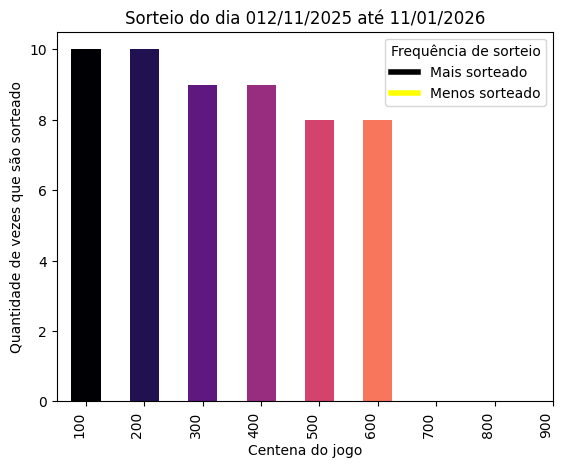

In [9]:
dta_inicio = '012/11/2025' # <= VE ESSE ERRO
dta_fim = '11/01/2026'

limites_Centena = [100, 200, 300, 400, 500, 600, 700, 800,900]
df_numCentena = df_numCentena[df_numCentena['dt_jogo'].between(dta_inicio,dta_fim)] 
counts_df_numCentena = df_numCentena['numCentena'].value_counts(bins=limites_Centena)
cores_dinamicas = cm.magma(np.linspace(0, 1, len(counts_df_numCentena)))

counts_df_numCentena.plot(kind='bar',x='Centena',y='Sortiado', 
        color=cores_dinamicas,
        legend=False) 

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8 ], labels=['100', '200', '300'
                                                  , '400', '500', '600'
                                                  , '700', '800', '900'], 
            fontsize=10, ha='right')

#plt.tight_layout()

legend_elements = [
    Line2D([0], [0], color='black', lw=4, label='Mais sorteado'),
    Line2D([0], [1], color='yellow', lw=4, label='Menos sorteado')
    #Patch(facecolor='orange', edgecolor='r', label='Área Laranja')
]
plt.legend(handles=legend_elements, loc='upper right', title='Frequência de sorteio')

plt.title('Sorteio do dia ' + str(dta_inicio)+' até '+ str(dta_fim)+'')
plt.xlabel('Centena do jogo')
plt.ylabel('Quantidade de vezes que são sorteado')

#### Convertendo a coluna numDezena string para int

In [10]:
all_table['numDezena'] = all_table['numDezena'].astype(int)

df_numDezena = pd.DataFrame()
intervalos = [(00, 10),(10, 20), (300, 40), (40, 50),(50, 60),(60, 70),(70, 80),(80, 90),(90, 99)]

for inicio, fim in intervalos:
    resultado = all_table.query('numDezena >= @inicio and numDezena <= @fim')
    
    df_numDezena = pd.concat([df_numDezena, resultado], ignore_index=True)
#print(df_numDezena) 

#### As dezenas mais sorteado em um período

Text(0, 0.5, 'Quantidade de vezes que são sorteado')

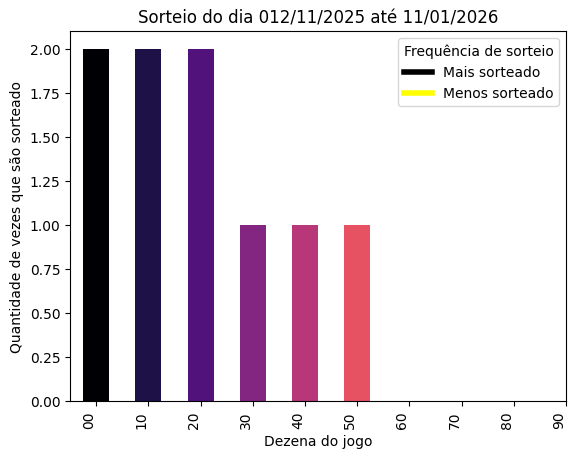

In [11]:
dta_inicio = '012/11/2025' # <= VE ESSE ERRO
dta_fim = '11/01/2026'

limites_Dezena = [00,10, 20, 30, 40, 50, 60, 70, 80,90]
df_numDezena = df_numDezena[df_numDezena['dt_jogo'].between(dta_inicio,dta_fim)] 
counts_df_numDezena = df_numDezena['numCentena'].value_counts(bins=limites_Dezena)
cores_dinamicas = cm.magma(np.linspace(0, 1, len(counts_df_numDezena)))

counts_df_numDezena.plot(kind='bar',x='Dezena',y='Sortiado', 
        color=cores_dinamicas,
        legend=False) 

plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ], labels=['00','10', '20', '30'
                                                  , '40', '50', '60'
                                                  , '70', '80', '90'], 
            fontsize=10, ha='right')

#plt.tight_layout()

legend_elements = [
    Line2D([0], [0], color='black', lw=4, label='Mais sorteado'),
    Line2D([0], [1], color='yellow', lw=4, label='Menos sorteado')
    #Patch(facecolor='orange', edgecolor='r', label='Área Laranja')
]
plt.legend(handles=legend_elements, loc='upper right', title='Frequência de sorteio')

plt.title('Sorteio do dia ' + str(dta_inicio)+' até '+ str(dta_fim)+'')
plt.xlabel('Dezena do jogo')
plt.ylabel('Quantidade de vezes que são sorteado')

#### Conclusão:
    Se nós pegarmos a faixas de números milharm, centena e dezena, horário e se e par ou impar que foram sorteadosnós temos um noção de próximo que pode ser sorteado, com isso a chance pode aumenta